# Progetto di Data Visualization e Data Manipulation


### Introduzione

In questo progetto andrò ad analizzare alcuni dei dataset messi a disposizione da kaggle che riguardano lo stato di felicità goblale e la libertà nei vari paesi.
Nello specifico andremo ad individuare quali sono i paesi più felici e quali sono i fattori socio-economici che hanno una maggiore influenza sull'indice di felicità del paese stesso, analizzando anche come e se  quest'ultimi siano cambiati nel corso degli anni.
Poichè uno dei parametri utilizzati dal World Happiness Report é la libertà individuale andremo a studiare anche quali sono i suoi  indicatori più importanti.

### Parole-Chiave

Score: Punteggio calcolato dal 2015 ponendo alle persone campionate la domanda: "Come valuteresti la tua felicità su una scala da 0 a 10 dove 10 è il più felice".

Happiness Rank: Posizione in classifica basata sulla felictà del paese

GDP per Capita: Produzione economica 

Social support :Supporto sociale da parte di familiari e non 

Health (Life Expectancy): Aspettativa di vita 

Freedom: Libertà (analizzeremo in seguito il suo significato)

Trust (Government Corruption): Fiducia nel governo e assenza di corruzione 

Generosity: Generosità

### Librerie

In [1]:
#importo le librerie necessarie 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import os

# Analisi dei principali fattori socio- economici 

### Data selection

In [2]:
#importo i dataset del world happiness report dal 2015 al 2019
os.chdir("c:\\Users\\vlrpe\\Desktop\\happy")

df_2015 =pd.read_csv(r"2015.csv")
df_2016 =pd.read_csv(r"2016.csv")
df_2017 =pd.read_csv(r"2017.csv")
df_2018 =pd.read_csv(r"2018.csv")
df_2019 =pd.read_csv(r"2019.csv")

### Data cleaning 

In [3]:
files= [df_2015,df_2016,df_2017,df_2018,df_2019]
strng =["df_2015","df_2016","df_2017","df_2018","df_2019"]

for name,file in zip(strng,files):
    print(name)
    print("")
    print(file.shape) 
    print((file.columns.values)) 
    print()

#inizio guardando come sono suddivisi i  vari dataset 

df_2015

(158, 12)
['Country' 'Region' 'Happiness Rank' 'Happiness Score' 'Standard Error'
 'Economy (GDP per Capita)' 'Family' 'Health (Life Expectancy)' 'Freedom'
 'Trust (Government Corruption)' 'Generosity' 'Dystopia Residual']

df_2016

(157, 13)
['Country' 'Region' 'Happiness Rank' 'Happiness Score'
 'Lower Confidence Interval' 'Upper Confidence Interval'
 'Economy (GDP per Capita)' 'Family' 'Health (Life Expectancy)' 'Freedom'
 'Trust (Government Corruption)' 'Generosity' 'Dystopia Residual']

df_2017

(155, 12)
['Country' 'Happiness.Rank' 'Happiness.Score' 'Whisker.high' 'Whisker.low'
 'Economy..GDP.per.Capita.' 'Family' 'Health..Life.Expectancy.' 'Freedom'
 'Generosity' 'Trust..Government.Corruption.' 'Dystopia.Residual']

df_2018

(156, 9)
['Overall rank' 'Country or region' 'Score' 'GDP per capita'
 'Social support' 'Healthy life expectancy' 'Freedom to make life choices'
 'Generosity' 'Perceptions of corruption']

df_2019

(156, 9)
['Overall rank' 'Country or region' 'Score

Già a prima vista si nota che ;
- non tutti i dataset sono suddivisi allo stesso modo (quindi dovremo andare a uniformarli) 
- il dataset del 2015 ci fornisce la lista completa dei paesi e delle regioni di appartenenza. 

In [4]:
country_region = df_2015[["Country","Region"]]
country_region_dict =dict(zip(country_region["Country"], country_region["Region"])) 
#li trasformo in un dizionario che utilizzerò in seguito 

### Preparazione dati e prima analisi esplorativa suddivisa per anno ( data exploration)

# 2015

In [5]:
#sistemo i dati anno per anno 
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df_2015 = df_2015.drop(["Standard Error","Dystopia Residual"], axis = 1) #elimino le colonne che non mi servono 

In [7]:
df_2015.columns = ["Country","Region","Rank","Score",
                   "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Trust","Generosity"]


In [8]:
df_2015 =df_2015[["Rank", "Country","Region","Score",
          "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]]  
df_2015.head()

Rank      Country          Region  Score  GDP per Capita  Social Support  \
0     1  Switzerland  Western Europe  7.587         1.39651         1.34951   
1     2      Iceland  Western Europe  7.561         1.30232         1.40223   
2     3      Denmark  Western Europe  7.527         1.32548         1.36058   
3     4       Norway  Western Europe  7.522         1.45900         1.33095   
4     5       Canada   North America  7.427         1.32629         1.32261   

   Health (Life Expectancy)  Freedom  Generosity    Trust  
0                   0.94143  0.66557     0.29678  0.41978  
1                   0.94784  0.62877     0.43630  0.14145  
2                   0.87464  0.64938     0.34139  0.48357  
3                   0.88521  0.66973     0.34699  0.36503  
4                   0.90563  0.63297     0.45811  0.32957

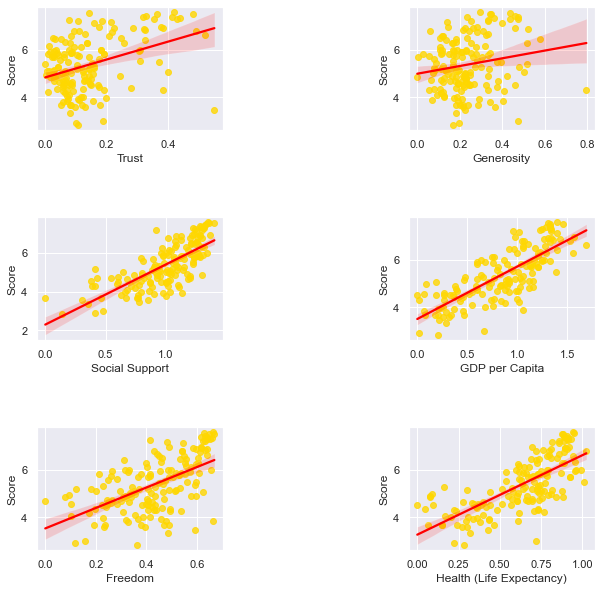

In [9]:
sns.set()
fig, axes = plt.subplots(3,2,figsize = (10,10))

fig.subplots_adjust(hspace= 0.7, wspace= 1)



fig1 =sns.regplot(x="Trust", y="Score",data=df_2015, ax = axes[0,0], scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig2 =sns.regplot(x="Generosity", y="Score",data=df_2015, ax =axes [0,1] ,scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig3 =sns.regplot(x="Social Support", y="Score",data=df_2015, ax =axes [1,0] ,scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"} )
fig4 =sns.regplot(x="GDP per Capita", y="Score",data=df_2015, ax =axes [1,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig5 =sns.regplot(x="Freedom", y="Score",data=df_2015, ax =axes [2,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig6 =sns.regplot(x='Health (Life Expectancy)', y="Score",data=df_2015, ax =axes [2,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})


# 2016


In [10]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [11]:
df_2016 = df_2016.drop(['Lower Confidence Interval',"Region", 'Upper Confidence Interval','Dystopia Residual'], axis =1)

In [12]:
df_2016.columns = ["Country","Rank","Score",
                   "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]

In [13]:
df_2016["Region"] = df_2016["Country"].map(country_region_dict)

df_2016 =df_2016[["Rank", "Country","Region", "Score",
          "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]]
df_2016.head()

Rank      Country          Region  Score  GDP per Capita  Social Support  \
0     1      Denmark  Western Europe  7.526         1.44178         1.16374   
1     2  Switzerland  Western Europe  7.509         1.52733         1.14524   
2     3      Iceland  Western Europe  7.501         1.42666         1.18326   
3     4       Norway  Western Europe  7.498         1.57744         1.12690   
4     5      Finland  Western Europe  7.413         1.40598         1.13464   

   Health (Life Expectancy)  Freedom  Generosity    Trust  
0                   0.79504  0.57941     0.44453  0.36171  
1                   0.86303  0.58557     0.41203  0.28083  
2                   0.86733  0.56624     0.14975  0.47678  
3                   0.79579  0.59609     0.35776  0.37895  
4                   0.81091  0.57104     0.41004  0.25492

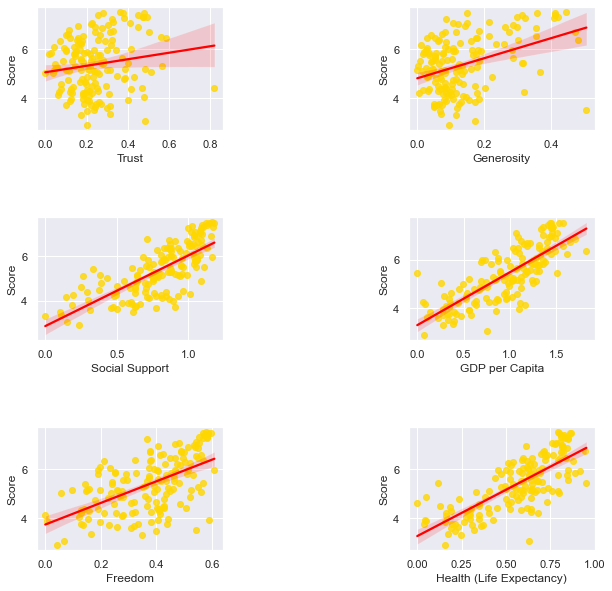

In [14]:
sns.set()
fig, axes = plt.subplots(3,2,figsize = (10,10))
fig.subplots_adjust(hspace= 0.7, wspace= 1)


fig1 =sns.regplot(x="Trust", y="Score",data=df_2016, ax = axes[0,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig2 =sns.regplot(x="Generosity", y="Score",data=df_2016, ax =axes [0,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig3 =sns.regplot(x="Social Support", y="Score",data=df_2016, ax =axes [1,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"} )
fig4 =sns.regplot(x="GDP per Capita", y="Score",data=df_2016, ax =axes [1,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig5 =sns.regplot(x="Freedom", y="Score",data=df_2016, ax =axes [2,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig6 =sns.regplot(x='Health (Life Expectancy)', y="Score",data=df_2016, ax =axes [2,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})

# 2017

In [15]:
df_2017 = df_2017.drop(["Whisker.high", "Whisker.low","Dystopia.Residual"], axis =1)

In [16]:
df_2017.columns = ["Country","Rank","Score",
                   "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]

In [17]:
df_2017["Region"] = df_2017["Country"].map(country_region_dict)

df_2017 =df_2017[["Rank", "Country","Region","Score",
          "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]]
df_2017.head()

Rank      Country          Region  Score  GDP per Capita  Social Support  \
0     1       Norway  Western Europe  7.537        1.616463        1.533524   
1     2      Denmark  Western Europe  7.522        1.482383        1.551122   
2     3      Iceland  Western Europe  7.504        1.480633        1.610574   
3     4  Switzerland  Western Europe  7.494        1.564980        1.516912   
4     5      Finland  Western Europe  7.469        1.443572        1.540247   

   Health (Life Expectancy)   Freedom  Generosity     Trust  
0                  0.796667  0.635423    0.362012  0.315964  
1                  0.792566  0.626007    0.355280  0.400770  
2                  0.833552  0.627163    0.475540  0.153527  
3                  0.858131  0.620071    0.290549  0.367007  
4                  0.809158  0.617951    0.245483  0.382612

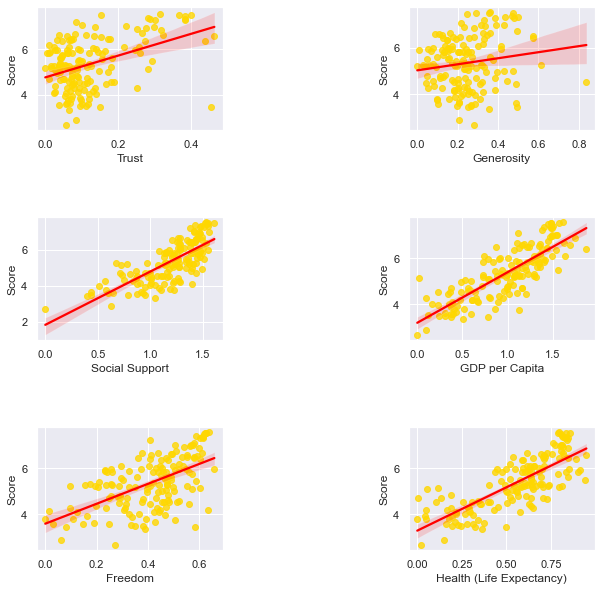

In [18]:
sns.set()
fig, axes = plt.subplots(3,2,figsize = (10,10))
fig.subplots_adjust(hspace= 0.7, wspace= 1)


fig1 =sns.regplot(x="Trust", y="Score",data=df_2017, ax = axes[0,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig2 =sns.regplot(x="Generosity", y="Score",data=df_2017, ax =axes [0,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig3 =sns.regplot(x="Social Support", y="Score",data=df_2017, ax =axes [1,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"} )
fig4 =sns.regplot(x="GDP per Capita", y="Score",data=df_2017, ax =axes [1,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig5 =sns.regplot(x="Freedom", y="Score",data=df_2017, ax =axes [2,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig6 =sns.regplot(x='Health (Life Expectancy)', y="Score",data=df_2017, ax =axes [2,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})

# 2018

In [19]:
df_2018.columns =["Rank", "Country","Score",
                   "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]

In [20]:
df_2018["Region"] = df_2018["Country"].map(country_region_dict)

df_2018 =df_2018[["Rank", "Country","Region","Score",
          "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]]
df_2018.head()

Rank      Country          Region  Score  GDP per Capita  Social Support  \
0     1      Finland  Western Europe  7.632           1.305           1.592   
1     2       Norway  Western Europe  7.594           1.456           1.582   
2     3      Denmark  Western Europe  7.555           1.351           1.590   
3     4      Iceland  Western Europe  7.495           1.343           1.644   
4     5  Switzerland  Western Europe  7.487           1.420           1.549   

   Health (Life Expectancy)  Freedom  Generosity  Trust  
0                     0.874    0.681       0.202  0.393  
1                     0.861    0.686       0.286  0.340  
2                     0.868    0.683       0.284  0.408  
3                     0.914    0.677       0.353  0.138  
4                     0.927    0.660       0.256  0.357

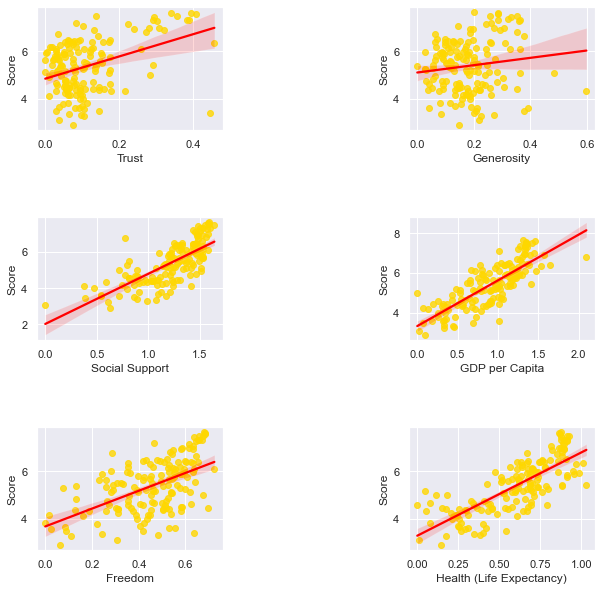

In [21]:
sns.set()
fig, axes = plt.subplots(3,2,figsize = (10,10))

fig.subplots_adjust(hspace= 0.7, wspace= 1)


fig1 =sns.regplot(x="Trust", y="Score",data=df_2018, ax = axes[0,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig2 =sns.regplot(x="Generosity", y="Score",data=df_2018, ax =axes [0,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig3 =sns.regplot(x="Social Support", y="Score",data=df_2018, ax =axes [1,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"} )
fig4 =sns.regplot(x="GDP per Capita", y="Score",data=df_2018, ax =axes [1,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig5 =sns.regplot(x="Freedom", y="Score",data=df_2018, ax =axes [2,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig6 =sns.regplot(x='Health (Life Expectancy)', y="Score",data=df_2018, ax =axes [2,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})

# 2019


In [22]:
df_2019.columns = ["Rank", "Country","Score",
                   "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]

In [23]:
df_2019["Region"] = df_2019["Country"].map(country_region_dict)

df_2019 =df_2019[["Rank", "Country","Region","Score",
          "GDP per Capita", "Social Support",'Health (Life Expectancy)',
                  "Freedom", "Generosity","Trust"]]
df_2019.head()

Rank      Country          Region  Score  GDP per Capita  Social Support  \
0     1      Finland  Western Europe  7.769           1.340           1.587   
1     2      Denmark  Western Europe  7.600           1.383           1.573   
2     3       Norway  Western Europe  7.554           1.488           1.582   
3     4      Iceland  Western Europe  7.494           1.380           1.624   
4     5  Netherlands  Western Europe  7.488           1.396           1.522   

   Health (Life Expectancy)  Freedom  Generosity  Trust  
0                     0.986    0.596       0.153  0.393  
1                     0.996    0.592       0.252  0.410  
2                     1.028    0.603       0.271  0.341  
3                     1.026    0.591       0.354  0.118  
4                     0.999    0.557       0.322  0.298

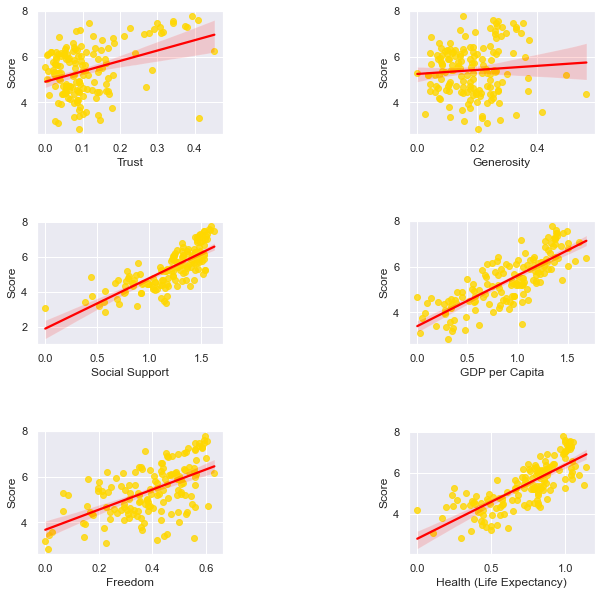

In [24]:
sns.set()
fig, axes = plt.subplots(3,2,figsize = (10,10))
fig.subplots_adjust(hspace= 0.7, wspace= 1)


fig1 =sns.regplot(x="Trust", y="Score",data=df_2019, ax = axes[0,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig2 =sns.regplot(x="Generosity", y="Score",data=df_2019, ax =axes [0,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig3 =sns.regplot(x="Social Support", y="Score",data=df_2019, ax =axes [1,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"} )
fig4 =sns.regplot(x="GDP per Capita", y="Score",data=df_2019, ax =axes [1,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig5 =sns.regplot(x="Freedom", y="Score",data=df_2019, ax =axes [2,0],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})
fig6 =sns.regplot(x='Health (Life Expectancy)', y="Score",data=df_2019, ax =axes [2,1],scatter_kws ={"color": "gold"} ,line_kws = {"color" :"red"})

Da questa prima analisi suddivisa per anni possiamo già trarre alcune conclusioni :
-  i paesi dell'europa occidentale hanno punteggi di felicità più alti 
-  i fattori che più influenzano il punteggio di felicità sono quasi sempre gli stessi
(ci ritorneremo più avanti)

 # Data transformation

In [25]:
#controllo che non ci siano differenze tra le colonne dei vari dataset
set(df_2015.columns)==set(df_2016.columns)==set(df_2017.columns)==set(df_2018.columns)==set(df_2019.columns)


True

In [26]:
for name,file in zip(strng,files):
    print(name,"has",file.shape,"rows X cols" )
    print("*********************")
    print(file.isnull().sum()) 
    print("\n") #controllo che non ci siano file vuoti 

df_2015 has (158, 12) rows X cols
*********************
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


df_2016 has (157, 13) rows X cols
*********************
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                

Per confrontare i vari dataset abbiamo bisogno di riempire i file vuoti 

In [27]:
print(df_2018[["Country","Region"]][df_2018["Region"].isnull()])   #cerco i file vuoti 

               Country Region
37   Trinidad & Tobago    NaN
48              Belize    NaN
57     Northern Cyprus    NaN
97             Somalia    NaN
118            Namibia    NaN
153        South Sudan    NaN


In [28]:
list(df_2018[df_2018["Region"].isnull()]["Country"])

['Trinidad & Tobago',
 'Belize',
 'Northern Cyprus',
 'Somalia',
 'Namibia',
 'South Sudan']

In [29]:
set(zip(df_2015["Country"],df_2015["Region"]))   

{('Afghanistan', 'Southern Asia'),
 ('Albania', 'Central and Eastern Europe'),
 ('Algeria', 'Middle East and Northern Africa'),
 ('Angola', 'Sub-Saharan Africa'),
 ('Argentina', 'Latin America and Caribbean'),
 ('Armenia', 'Central and Eastern Europe'),
 ('Australia', 'Australia and New Zealand'),
 ('Austria', 'Western Europe'),
 ('Azerbaijan', 'Central and Eastern Europe'),
 ('Bahrain', 'Middle East and Northern Africa'),
 ('Bangladesh', 'Southern Asia'),
 ('Belarus', 'Central and Eastern Europe'),
 ('Belgium', 'Western Europe'),
 ('Benin', 'Sub-Saharan Africa'),
 ('Bhutan', 'Southern Asia'),
 ('Bolivia', 'Latin America and Caribbean'),
 ('Bosnia and Herzegovina', 'Central and Eastern Europe'),
 ('Botswana', 'Sub-Saharan Africa'),
 ('Brazil', 'Latin America and Caribbean'),
 ('Bulgaria', 'Central and Eastern Europe'),
 ('Burkina Faso', 'Sub-Saharan Africa'),
 ('Burundi', 'Sub-Saharan Africa'),
 ('Cambodia', 'Southeastern Asia'),
 ('Cameroon', 'Sub-Saharan Africa'),
 ('Canada', 'North 

In [30]:
nan_region_dict_2018 ={'Trinidad & Tobago':'Latin America and Caribbean',
                       'Belize':'Latin America and Caribbean',
                       'Northern Cyprus':'Western Europe',
                       'Somalia':'Middle East and Northern Africa',
                       'Namibia':'Sub-Saharan Africa',
                        'South Sudan':'Sub-Saharan Africa'
                  }

In [31]:
df_2018.loc[df_2018["Region"].isnull(),"Region"].copy = list(nan_region_dict_2018.values())

In [32]:
nan_region_dict_2019 ={'Trinidad & Tobago':'Latin America and Caribbean',
                       'Northern Cyprus':'Western Europe',
                       'North Macedonia': 'Western Europe',
                       'Somalia':'Middle East and Northern Africa',
                       'Namibia':'Sub-Saharan Africa',
                       'Gambia':'Sub-Saharan Africa',                  
                       'South Sudan':'Sub-Saharan Africa',
                       }

In [33]:
df_2019.loc[df_2019["Region"].isnull(),"Region"].copy = list(nan_region_dict_2019.values())
df_2019.loc[:,("Year")]= 2019
df_2018.loc[:,("Year")]= 2018
df_2017.loc[:,("Year")]= 2017
df_2016.loc[:,("Year")]= 2016
df_2015.loc[:,("Year")]= 2015

In [34]:
df_merge = pd.concat([df_2015, df_2016,df_2017,df_2018,df_2019]) #uniamo i dataset.

# Data Visualization

In [35]:
fig = px.choropleth(df_merge, locations=df_merge["Country"], locationmode = "country names" ,color="Score",
                    animation_frame="Year",title='World Happiness',)
fig.show()


Qui possiamo dare un occhiata complessiva a quali sono i paesi più felici e come cambiano dal 2015 al 2019

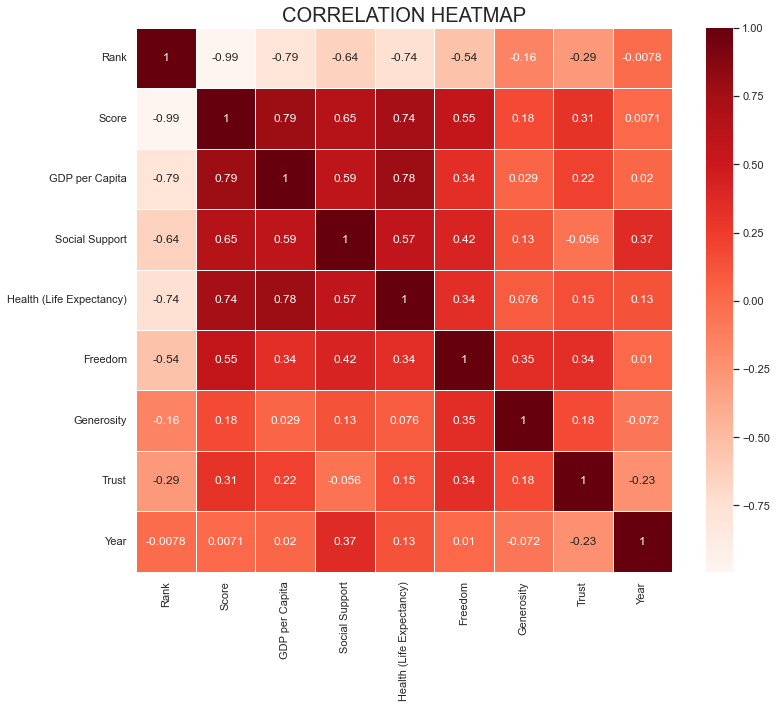

In [36]:
plt.figure(figsize=(12,10))
corr= df_merge.corr()
plt.title("CORRELATION HEATMAP",fontsize=20)
annot = True
sns.heatmap(corr, annot=annot ,cmap = "Reds", linewidths=1)

corr = corr[["Score"]]
corr.index.name = "Factors"
corr = corr.sort_values("Score", ascending=True)
fig=px.funnel(corr, x= "Score", y= corr.index,color = corr.index,
             title = 'Classifica (Più influente -> Meno influente )')
fig.show()

### info :
-nel grafico heathmap più è forte la correlazione più sarà scuro il colore 

### Alcune osservazioni ;
-Dai vari grafici possiamo dedurre che tra i principali fattori che determinato la felictà complessiva di un paese ci sono,rispettivamente :"GDP per Capita,la salute(aspettativa di vita) e social support".


-I 3 fattori più rilevanti hanno una stretta correlazione anche tra loro , soprattutto salute /GDP per capita e questo ci fa capire che più un paese ha un alto benessere economico più i cittadini hanno accesso a cure e una più lunga aspettativa di vita.


-Risultano molto meno incisive le correlazioni tra la fiducia nel governo e la generosità con gli altri parametri

Ma andiamo a vedere meglio i 3 principali fattori negli anni.

In [38]:
fig1 = px.scatter(df_merge, x = "GDP per Capita", y = 'Score',facet_row="Year",color="Year" , trendline= "ols", color_continuous_scale=px.colors.sequential.Viridis,
                  title = 'Score vs GDP per Capita (per ogni anno)')
fig1.show()

In [39]:
figwhat = px.scatter(df_merge, x = "Social Support", y = 'Score', facet_row="Year", color = "Year", trendline= "ols",color_continuous_scale=px.colors.sequential.Viridis, 
                     title = 'Score vs Social support (Per ogni anno)')
figwhat.show()

In [40]:
fig2 = px.scatter(df_merge, x = "Health (Life Expectancy)", y = 'Score', facet_row="Year", color = "Year", trendline= "ols",color_continuous_scale=px.colors.sequential.Viridis, 
                  title = 'Score vs Healthy life expectancy (Per ogni anno)')
fig2.show()

### Conclusione parziale :
Da questa analisi iniziale possiamo dedurre che i fattori principale che stabilisco i livelli più alti di felictà rimangono bene o male costanti negli anni( ad eccezione del 2015 dove il social support era leggermente più impattante dell'aspettativa di vita.)

Possiamo concludere ,quindi, che per i cittadini dei vari paesi il benessere economico è al primo posto tra i fattori più rilevanti , seguito dalla salute e dal supporto della famiglia.


## FREEDOM

Dal momento che la libertà è uno dei valori chiave per la felcità dei paesi, ci soffermiavo su analizzare quale è il significato di libertà per i vari paesi.

I dati che andremo ad analizzare si possono dividere in 3 macro categorie ;

hf = valutazione complessiva della libertà

pf= libertà individuale 

ef= libertà economica 

Queste 3 categorie principali di suddivideranno in :
Rule of Law = diritti 

Security and Safety = sicurezza individuale

pf_Movement = libertà di spostarsi

pf_Religion = libertà di religione 

pf_expression = libertà di parola

pf_womens = libertà donne 

pf_identity = libertà di esprimere se stesso e la propria identità

ef_Government = grandezza del paese 

ef_regulation = regolamentazione giusta del lavoro

ef_money = libero accesso alla moneta contante 

ef_trade = libertà di commercio internazionale 

ef_legal =  diritto di proprietà

### Data cleaning 

In [42]:
hf_2021 = pd.read_csv("hfi_cc_2021.csv")
hf_2021.head()

year  countries  ISO                         region  hf_score  hf_rank  \
0  2019    Albania  ALB                 Eastern Europe      8.14     43.0   
1  2019    Algeria  DZA     Middle East & North Africa      5.26    154.0   
2  2019     Angola  AGO             Sub-Saharan Africa      6.09    129.0   
3  2019  Argentina  ARG  Latin America & the Caribbean      7.38     74.0   
4  2019    Armenia  ARM        Caucasus & Central Asia      8.20     40.0   

   hf_quartile  pf_rol_procedural  pf_rol_civil  pf_rol_criminal  ...  \
0          2.0               5.97          4.76             4.26  ...   
1          4.0               5.21          5.64             4.35  ...   
2          4.0               2.72          4.43             3.60  ...   
3          2.0               6.83          5.94             4.35  ...   
4          1.0                NaN           NaN              NaN  ...   

   ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0                        5.65                                6.67   
1                        4.22                                2.22   
2                        2.94                                2.44   
3                        2.71                                5.78   
4                        5.17                                5.56   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                          9.74                           6.24   
1                          9.31                           2.58   
2                          8.73                           4.70   
3                          9.58                           6.53   
4                          9.86                           6.96   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                              5.62                               7.18   
1                              8.77                               7.03   
2                              7.92                               6.78   
3                              5.73                               6.51   
4                              9.30                               7.04   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                    6.85           7.70      7.81     31.0  
1                    5.69           5.84      4.90    162.0  
2                    5.59           5.97      5.50    153.0  
3                    6.14           5.99      5.50    153.0  
4                    7.32           7.82      8.03     15.0  

[5 rows x 125 columns]

In [43]:
hf_2021.dtypes

year                                   int64
countries                             object
ISO                                   object
region                                object
hf_score                             float64
                                      ...   
ef_regulation_business_compliance    float64
ef_regulation_business               float64
ef_regulation                        float64
ef_score                             float64
ef_rank                              float64
Length: 125, dtype: object

In [44]:
hf_2021.columns

Index(['year', 'countries', 'ISO', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=125)

In [45]:
hf_2021.isnull().sum()

year                                   0
countries                              0
ISO                                    0
region                                 0
hf_score                             113
                                    ... 
ef_regulation_business_compliance    127
ef_regulation_business               117
ef_regulation                        100
ef_score                             113
ef_rank                              113
Length: 125, dtype: int64

### Data exploration

In [1]:
corr = hf_2021.corr(method="pearson")
corr.style.background_gradient( cmap='coolwarm')

NameError: name 'hf_2021' is not defined

In [47]:
hf_2021.sort_values('hf_score',ascending=False).head()

year    countries  ISO          region  hf_score  hf_rank  hf_quartile  \
473  2017  Switzerland  CHE  Western Europe      9.15      1.0          1.0   
604  2016  New Zealand  NZL         Oceania      9.14      1.0          1.0   
308  2018  Switzerland  CHE  Western Europe      9.14      1.0          1.0   
769  2015  New Zealand  NZL         Oceania      9.13      1.0          1.0   
274  2018  New Zealand  NZL         Oceania      9.12      2.0          1.0   

     pf_rol_procedural  pf_rol_civil  pf_rol_criminal  ...  \
473                NaN           NaN              NaN  ...   
604               8.37          7.88             7.36  ...   
308                NaN           NaN              NaN  ...   
769               8.37          7.88             7.36  ...   
274               8.35          7.84             7.22  ...   

     ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
473                        6.21                                8.00   
604                        5.49                               10.00   
308                        6.32                                8.00   
769                        5.08                               10.00   
274                        5.19                                9.78   

     ef_regulation_business_start  ef_regulation_business_bribes  \
473                          9.57                          10.00   
604                          9.98                           9.65   
308                          9.58                           9.79   
769                          9.98                           9.65   
274                          9.98                           9.65   

     ef_regulation_business_licensing  ef_regulation_business_compliance  \
473                              8.37                               9.52   
604                              9.40                               8.43   
308                              8.37                               9.29   
769                              9.40                               8.30   
274                              9.40                               8.43   

     ef_regulation_business  ef_regulation  ef_score  ef_rank  
473                    8.61           8.60      8.57      4.0  
604                    8.83           9.22      8.62      3.0  
308                    8.56           8.57      8.54      4.0  
769                    8.73           9.19      8.60      3.0  
274                    8.74           9.01      8.56      3.0  

[5 rows x 125 columns]

Dopo aver dato un occhiata su come è composto il dataset ,decido di creare un nuovo df con i fattori che ritengo più
importanti ,in modo che la visualizzazione dei dati risulti più chiara e comprensibile 

In [48]:
new_hf_2021 = pd.DataFrame() # creo il nuovo df partendo da quello precendete e importanto solo i dati che mi servono 
new_hf_2021["year"] =hf_2021.year
new_hf_2021["countries"] =hf_2021.countries
new_hf_2021["hf_score"] =hf_2021.hf_score
new_hf_2021["pf_score"] =hf_2021.pf_score
new_hf_2021["ef_score"] =hf_2021.ef_score
new_hf_2021["Rule_of_law"] =hf_2021.pf_rol 
new_hf_2021["security_and_safety"] =hf_2021.pf_ss
new_hf_2021["pf_movement"] =hf_2021.pf_movement
new_hf_2021["pf_religion"] =hf_2021.pf_religion
new_hf_2021["pf_expression"] =hf_2021.pf_expression
new_hf_2021["pf_identity"] =hf_2021.pf_identity
new_hf_2021["pf_womens"] =hf_2021.pf_womens
new_hf_2021["ef_government"] =hf_2021.ef_government
new_hf_2021["ef_legal"] =hf_2021.ef_legal
new_hf_2021["ef_money"] =hf_2021.ef_money
new_hf_2021["ef_trade"] =hf_2021.ef_trade
new_hf_2021["ef_regulation"] =hf_2021.ef_regulation

new_hf_2021.columns

Index(['year', 'countries', 'hf_score', 'pf_score', 'ef_score', 'Rule_of_law',
       'security_and_safety', 'pf_movement', 'pf_religion', 'pf_expression',
       'pf_identity', 'pf_womens', 'ef_government', 'ef_legal', 'ef_money',
       'ef_trade', 'ef_regulation'],
      dtype='object')

In [49]:
new_hf_2021.dtypes

year                     int64
countries               object
hf_score               float64
pf_score               float64
ef_score               float64
Rule_of_law            float64
security_and_safety    float64
pf_movement            float64
pf_religion            float64
pf_expression          float64
pf_identity            float64
pf_womens              float64
ef_government          float64
ef_legal               float64
ef_money               float64
ef_trade               float64
ef_regulation          float64
dtype: object

In [50]:
new_hf_2021.sort_values('hf_score',ascending=False).query("year== 2019").head() 
#prendo ad esempio solo il 2019 per capire più o meno i valori del df ma lo vedremo meglio più avanti 

year    countries  hf_score  pf_score  ef_score  Rule_of_law  \
143  2019  Switzerland      9.11      9.56      8.48         8.17   
109  2019  New Zealand      9.01      9.33      8.56         7.80   
42   2019      Denmark      8.98      9.56      8.17         8.80   
48   2019      Estonia      8.91      9.48      8.11         7.98   
73   2019      Ireland      8.90      9.40      8.21         7.37   

     security_and_safety  pf_movement  pf_religion  pf_expression  \
143                 9.87         9.85         9.52           9.80   
109                 8.50         9.94         9.89           9.50   
42                  9.75         9.86         9.50           9.23   
48                  9.63         9.92         9.67           9.41   
73                  9.62         9.89         9.63           9.59   

     pf_identity  pf_womens  ef_government  ef_legal  ef_money  ef_trade  \
143         10.0       9.93           7.69      8.68      9.85      7.89   
109         10.0       9.98           6.60      8.68      9.78      8.76   
42          10.0       9.97           5.34      8.61      9.60      8.77   
48          10.0       9.97           6.60      7.70      9.36      8.68   
73          10.0       9.96           6.72      7.68      9.50      8.73   

     ef_regulation  
143           8.27  
109           8.98  
42            8.54  
48            8.22  
73            8.40

In [51]:
new_hf_2021.sort_values('ef_score',ascending=False).query("year== 2019").head()

year             countries  hf_score  pf_score  ef_score  Rule_of_law  \
66   2019  Hong Kong SAR, China      8.41      8.06      8.91         7.07   
133  2019             Singapore      7.98      7.39      8.81         7.71   
109  2019           New Zealand      9.01      9.33      8.56         7.80   
143  2019           Switzerland      9.11      9.56      8.48         8.17   
56   2019               Georgia      8.20      8.15      8.26         5.45   

     security_and_safety  pf_movement  pf_religion  pf_expression  \
66                  9.31         9.58         8.55           6.99   
133                 9.79         8.38         7.82           4.61   
109                 8.50         9.94         9.89           9.50   
143                 9.87         9.85         9.52           9.80   
56                  9.11         8.60         8.55           8.08   

     pf_identity  pf_womens  ef_government  ef_legal  ef_money  ef_trade  \
66         10.00       9.93           8.42      7.53      9.74      9.56   
133         8.13       9.33           7.56      8.28      9.76      9.44   
109        10.00       9.98           6.60      8.68      9.78      8.76   
143        10.00       9.93           7.69      8.68      9.85      7.89   
56          8.75       8.92           8.14      6.72      9.18      9.12   

     ef_regulation  
66            9.29  
133           9.01  
109           8.98  
143           8.27  
56            8.16

In [53]:
new_hf_2021.sort_values('pf_score',ascending=False).query("year== 2019").head()

year    countries  hf_score  pf_score  ef_score  Rule_of_law  \
142  2019       Sweden      8.83      9.63      7.72         8.61   
143  2019  Switzerland      9.11      9.56      8.48         8.17   
42   2019      Denmark      8.98      9.56      8.17         8.80   
52   2019      Finland      8.85      9.52      7.92         8.68   
114  2019       Norway      8.76      9.50      7.72         8.65   

     security_and_safety  pf_movement  pf_religion  pf_expression  \
142                 9.81         9.76         9.88           9.54   
143                 9.87         9.85         9.52           9.80   
42                  9.75         9.86         9.50           9.23   
52                  9.59         9.94         9.63           9.60   
114                 9.73         9.78         9.61           9.66   

     pf_identity  pf_womens  ef_government  ef_legal  ef_money  ef_trade  \
142        10.00       9.92           4.68      7.87      9.74      8.49   
143        10.00       9.93           7.69      8.68      9.85      7.89   
42         10.00       9.97           5.34      8.61      9.60      8.77   
52         10.00       9.98           5.14      8.60      9.39      8.50   
114         9.38       9.28           5.11      8.51      9.38      7.91   

     ef_regulation  
142           7.81  
143           8.27  
42            8.54  
52            7.96  
114           7.71

### Data visualization 

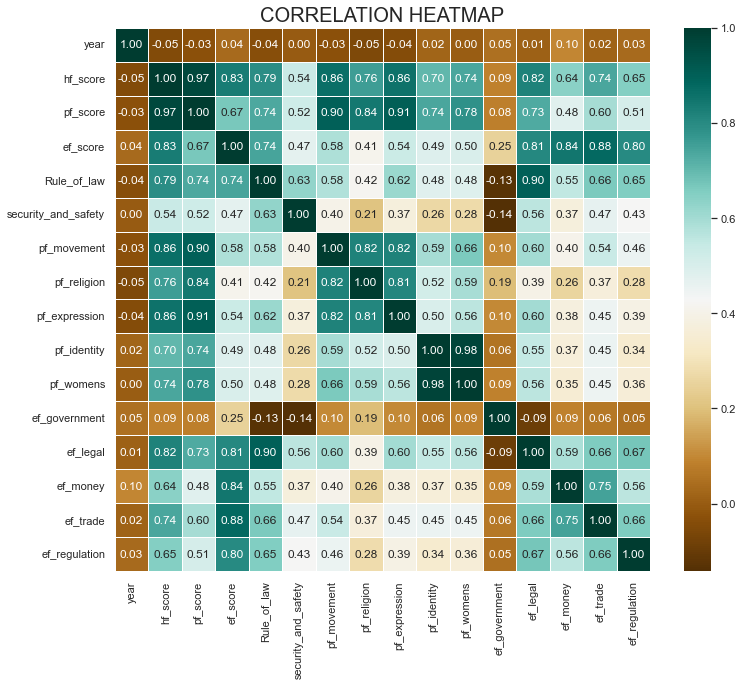

In [54]:
plt.figure(figsize=(12,10))
plt.title("CORRELATION HEATMAP",fontsize=20)
sns.heatmap(data=new_hf_2021.corr(),cmap="BrBG",annot=True,  fmt=".2f",linewidths=1)
plt.show()

### informazioni
-le celle blu dimostrano un' ALTA CORRELAZIONE tra i parametri


-le celle marroni mosrano una BASSA CORRELAZIONE tra i parametri 


-le celle bianche mostrano una correlazione INESISTENTE o quasi

### Osservazioni 
-i diritti ( rule of law ) hanno un grande impatto sia sulla libetà economica che su quella individuale 


-la libertà individuale è principalmente influenzata dalla libertà di espressione e dalla libertà di movimento ,
ma anche se in minor modo  dalla religione e dalla libertà delle donne .


-la libertà di commercio internazionale  è  il fattore più determinante per la libertà economica di un paese , seguito in ordine  dal libero accesso alla moneta contante ,  dai diritti di proprietà e  dalla regolamentazione del lavoro. 


-inoltre, è interessante notare quanto la grandezza di un paese sia molto poco importante per determinarne  la libertà 


#### Adesso che abbiamo individuato i fattori chiave per la libertà individuale e quella economica possiamo osservare le loro correlazioni più attentamente .

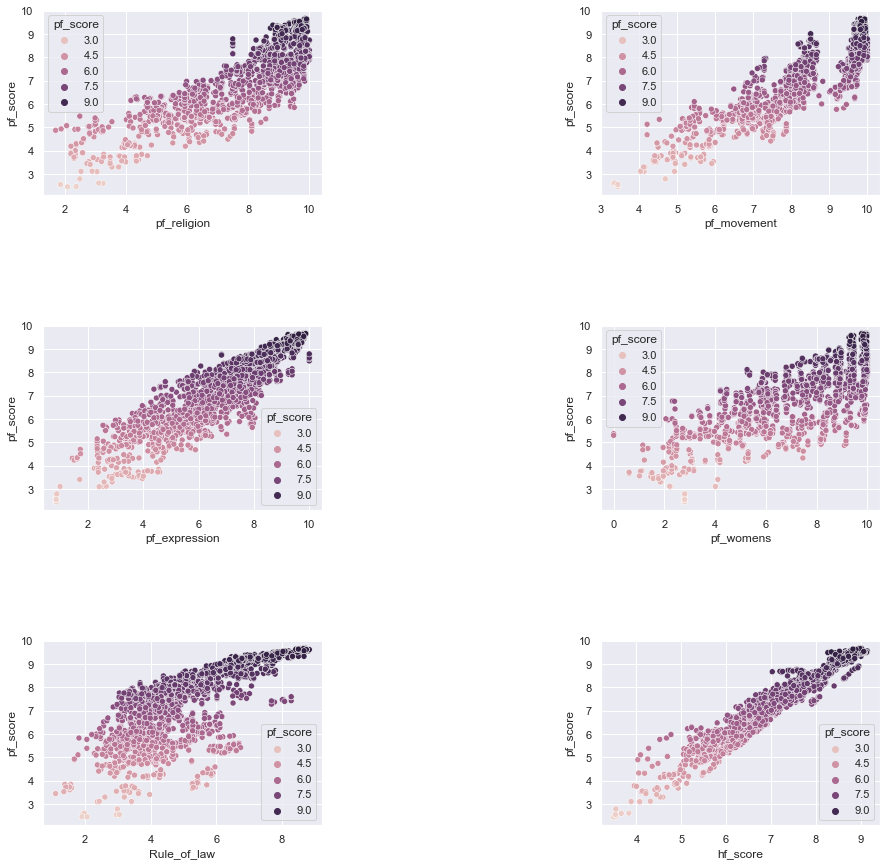

In [56]:
sns.set()
fig, axes = plt.subplots(3,2,figsize = (15,15))
fig.subplots_adjust(hspace= 0.7, wspace= 1)

fig0 =sns.scatterplot(x='hf_score', y="pf_score",hue = "pf_score",data=new_hf_2021, ax =axes [2,1])
fig1 =sns.scatterplot(x="pf_religion", y="pf_score" , hue = "pf_score", data=new_hf_2021, ax = axes[0,0])
fig2 =sns.scatterplot(x="pf_movement", y="pf_score",hue = "pf_score" ,data=new_hf_2021, ax =axes [0,1])
fig3 =sns.scatterplot(x="pf_expression", y="pf_score",hue = "pf_score",data=new_hf_2021, ax =axes [1,0] )
fig4 =sns.scatterplot(x="pf_womens", y="pf_score",hue = "pf_score",data=new_hf_2021, ax =axes [1,1])
fig5 =sns.scatterplot(x="Rule_of_law", y="pf_score",hue = "pf_score",data=new_hf_2021, ax =axes [2,0])


In [60]:
corr =new_hf_2021.corr()

corr = corr[['pf_score']]
corr.index.name = 'Factors'
corr = corr.sort_values('pf_score', ascending=False)
fig=px.bar(corr, x= corr.index  , y= 'pf_score',color= corr.index,
             title ="Fattori vs Libertà personale")
fig.show()

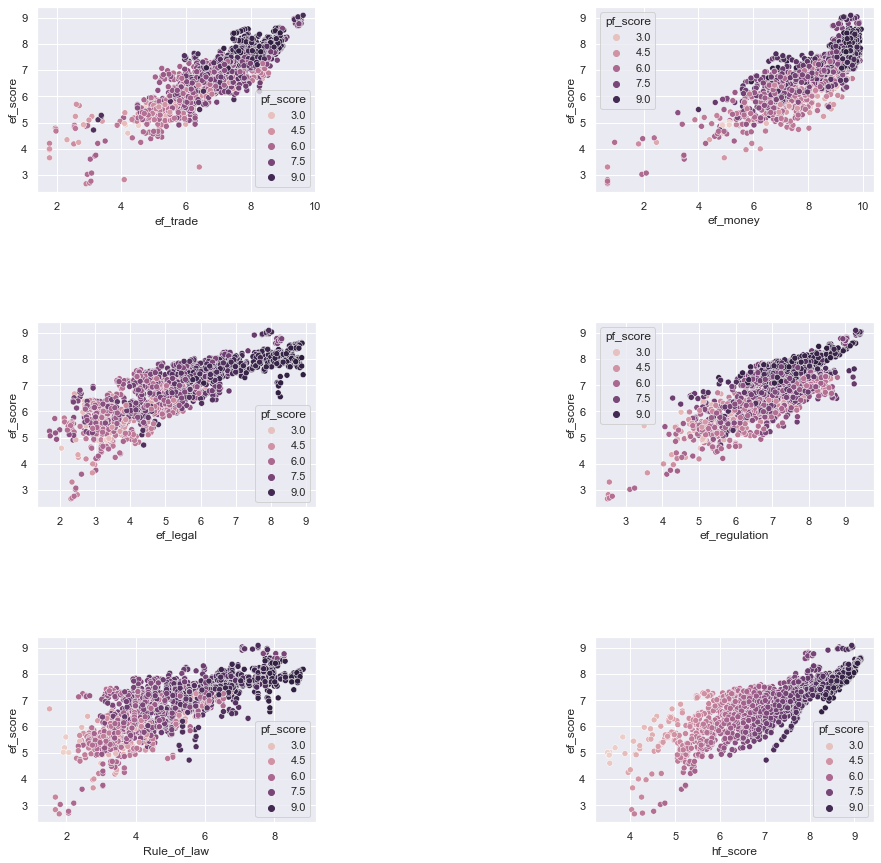

In [61]:
sns.set()
fig, axes = plt.subplots(3,2,figsize = (15,15))
fig.subplots_adjust(hspace= 0.7, wspace= 1)

fig0 =sns.scatterplot(x='hf_score', y="ef_score", hue = "pf_score",data=new_hf_2021, ax =axes [2,1])
fig1 =sns.scatterplot(x="ef_trade", y="ef_score" , hue = "pf_score", data=new_hf_2021, ax = axes[0,0])
fig2 =sns.scatterplot(x="ef_money", y="ef_score",hue = "pf_score" ,data=new_hf_2021, ax =axes [0,1])
fig3 =sns.scatterplot(x="ef_legal", y="ef_score",hue = "pf_score",data=new_hf_2021, ax =axes [1,0] )
fig4 =sns.scatterplot(x="ef_regulation", y="ef_score",hue = "pf_score",data=new_hf_2021, ax =axes [1,1])
fig5 =sns.scatterplot(x="Rule_of_law", y="ef_score",hue = "pf_score",data=new_hf_2021, ax =axes [2,0])

In [62]:
corr =new_hf_2021.corr()
corr = corr[['ef_score']]
corr.index.name = 'Factors'
corr = corr.sort_values('ef_score', ascending=False)
fig=px.bar(corr, x= corr.index  , y= 'ef_score',color= corr.index,
             title ="Fattori vs Libertà economica")
fig.show()

## Quali sono i paesi con più libertà individuale ?

In [63]:
fig = px.choropleth(hf_2021, locations=hf_2021["countries"], locationmode = "country names" ,color="pf_rank",
                    animation_frame="year",title='Paesi con maggiore libertà personale')
fig.show()

### Quali sono i paesi con maggiore libertà economica?

In [64]:
fig = px.choropleth(hf_2021, locations=hf_2021["countries"], locationmode = "country names" ,color="ef_rank",
                    animation_frame="year",title='Paesi con maggiore libertà economica')
fig.show()

### Conclusioni :
tramite le analisi dei due dataset siamo riusciti ad individuare :

-quale sono i fattori determinanti per la felicità di un paese (GDP per Capita,aspettativa di vita e Social support)

-tendenzialmente nel corso degli anni (2015-2019) i paesi dell' Europa Occidentale hanno raggiunto i punteggi più alti sia di felicità che di libertà.

-la libertà di parola ed espressione e il libero commercio rendono un paese più libero .

